In [ ]:
!pip install dipy

In [ ]:
from typing import Any
import numpy as np
from matplotlib import pyplot as plt

# Signaux sur une sphére



On les rencontre dans tous les problèmes physiques où les solutions s'expriment plus naturellement en coordonnées sphérique. Ils sont aussi très utiles en tomographie = reconstituer des images médicales en prenant des photos dans toutes les directions.


Coordonnées polaires

In [ ]:
def pol_to_cart(rho,θ,ϕ):
    x=rho*np.sin(θ)*np.cos(ϕ)
    y=rho*np.sin(θ)*np.sin(ϕ)
    z=rho*np.cos(θ)
    return x,y,z

Spherical_Coordinates_(Colatitude,_Longitude)_(b).svg

## Fonction sur une sphére




In [ ]:
class SpherePlot:

    @staticmethod
    def add_labels_xyz(ax):
        ax.set_xlabel("x")
        ax.set_ylabel("y")
        ax.set_zlabel("z")

    @staticmethod
    def scatter_color(ax,θ, ϕ, value):
        SpherePlot.add_labels_xyz(ax)
        x, y, z = pol_to_cart(1, θ, ϕ)
        ax.scatter(x, y, z, c=value, cmap="coolwarm")

    @staticmethod
    def surface_color(ax, θϕ__θ, θϕ__ϕ, θϕ__value):
        SpherePlot.add_labels_xyz(ax)
        x, y, z = pol_to_cart(1, θϕ__θ, θϕ__ϕ)
        scmap = plt.cm.ScalarMappable(cmap="coolwarm")
        ax.plot_surface(x, y, z, facecolors=scmap.to_rgba(θϕ__value), shade=False)

    @staticmethod
    def surface_radius_from_0(ax, θϕ__θ, θϕ__ϕ, θϕ__value,add_color=True):
        SpherePlot.add_labels_xyz(ax)
        x, y, z = pol_to_cart(θϕ__value, θϕ__θ, θϕ__ϕ)
        if add_color:
            scmap = plt.cm.ScalarMappable(cmap="coolwarm")
            ax.plot_surface(x, y, z,facecolors=scmap.to_rgba(θϕ__value), shade=False)
        else:
            ax.plot_surface(x, y, z)

    @staticmethod
    def surface_radius_from_1(ax, θϕ__θ, θϕ__ϕ, θϕ__value,add_color=True):
        SpherePlot.add_labels_xyz(ax)
        θϕ__value=θϕ__value-np.min(θϕ__value)
        θϕ__value/=np.max(θϕ__value)
        x, y, z = pol_to_cart(1+θϕ__value, θϕ__θ, θϕ__ϕ)
        if add_color:
            scmap = plt.cm.ScalarMappable(cmap="coolwarm")
            ax.plot_surface(x, y, z,facecolors=scmap.to_rgba(θϕ__value), shade=False)
        else:
            ax.plot_surface(x, y, z)

In [ ]:
def mesh_grid_θϕ(n_θ, n_ϕ, endpoint=True):
    θϕ__θ, θϕ__ϕ = np.meshgrid(np.linspace(0, np.pi, n_θ), np.linspace(0, 2 * np.pi, n_ϕ, endpoint=endpoint), indexing="ij")
    return θϕ__θ, θϕ__ϕ


In [ ]:
def u_fn(θ,ϕ):
    rho=1
    x,y,z = pol_to_cart(rho,θ,ϕ)
    return x*y+z*0.5

n_θ=20
n_ϕ=30
θϕ__θ, θϕ__ϕ = mesh_grid_θϕ(n_θ,n_ϕ)
θϕ__u =  u_fn(θϕ__θ, θϕ__ϕ)

fig = plt.figure(figsize=(12, 12))
ax1:Any = fig.add_subplot(2,2,1,projection='3d')
ax2:Any = fig.add_subplot(2,2,2,projection='3d')
ax3:Any = fig.add_subplot(2,2,3,projection='3d')
ax4:Any = fig.add_subplot(2,2,4,projection='3d')


SpherePlot.scatter_color(ax1,θϕ__θ, θϕ__ϕ,θϕ__u)
SpherePlot.surface_color(ax2,θϕ__θ, θϕ__ϕ,θϕ__u)
SpherePlot.surface_radius_from_0(ax3,θϕ__θ, θϕ__ϕ,θϕ__u)
SpherePlot.surface_radius_from_1(ax4,θϕ__θ, θϕ__ϕ,θϕ__u)


In [ ]:
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(projection='3d')
ax.set_xlabel("θ")
ax.set_ylabel("ϕ")

ax.plot_surface(θϕ__θ, θϕ__ϕ, θϕ__u,cmap="coolwarm")

#### ♡♡

Quels sont les conditions sur une fonction en coordonnée sphérique Θ et Φ pour qu'elle soit continue sur la sphére.

## Harmonique sphérique.


### Changement de variable pour un opérateur différentiel


Quand on fait un changement de variable, il faut changer d'opérateurs différenciels. Mais pourquoi?
Expliquons avec le changement de variable $X=x^2$ pour $x$ et $X$ positif.


On considére une fonction $g(x)$ elle sécrit aussi
$$
g(x) = f(X)
$$
pour une certaine fonction $f$ (laquelle ?)



Calculons la dérivée de $g$:
$$
\frac {\partial } {\partial x}g(x) = \frac {\partial } {\partial x} \big[f(x^2)\big] =
2x f'(x^2) = 2\sqrt{X} \frac {\partial } {\partial X} f(X)   
$$
ainsi en terme d'opérateur de dérivation:
$$
\frac {\partial } {\partial x} \to   2\sqrt{X} \frac {\partial } {\partial X}
$$




### Laplacien sphérique


On considère une fonction $g(x,y,z)$ sur $\mathbb R^3$. Son laplacien est:
$$
\Delta g(x,y,z)= \frac {\partial ^{2}g} {\partial x^{2}}+\frac {\partial ^{2}g} {\partial y^{2}}+\frac {\partial ^{2}g} {\partial z^{2}}
$$

Si l'on fait le changement de variable polaire $g(x,y,z)=f(r,\theta,\phi)$ alors l'opérateur laplacien s'écrit ainsi sur $f$:

$$
{\displaystyle \dot \Delta f={\frac {\partial ^{2}f}{\partial r^{2}}}+{\frac {2}{r}}{\frac {\partial f}{\partial r}}+{\frac {1}{r^{2}}}{\frac {\partial ^{2}f}{\partial \theta ^{2}}}+{\frac {1}{r^{2}\tan \theta }}{\frac {\partial f}{\partial \theta }}+{\frac {1}{r^{2}\sin ^{2}\theta }}{\frac {\partial ^{2}f}{\partial \varphi ^{2}}}}
$$
(on a mis un point au-dessus pour dire que c'est le laplacien en coordonnées sphériques).

Parfois on utilise aussi cette forme:
$$
{\displaystyle \dot \Delta f={\frac {1}{r^{2}}}{\frac {\partial }{\partial r}}\left(r^{2}{\frac {\partial f}{\partial r}}\right)+{\frac {1}{r^{2}\sin \theta }}{\frac {\partial }{\partial \theta }}\left(\sin \theta {\frac {\partial f}{\partial \theta }}\right)+{\frac {1}{r^{2}\sin ^{2}\theta }}{\frac {\partial ^{2}f}{\partial \varphi ^{2}}}}
$$
(en développant les dérivations on retombe sur la première forme).

### Harmonique sphérique

Les fonctions harmoniques sont les solutions de
$$
\Delta g(x,y,z) = 0 \qquad
$$
qui sont donc en correspondance directement avec les solutions de
$$
\dot \Delta f(r,\theta,\phi) = 0
$$


Pour résoudre ceci, on peut utiliser la technique de la séparation de variable = On cherche les solutions qui s'écrivent comme le produit de trois fonctions en $r,\theta,\phi$.


On [montre](https://drive.google.com/file/d/1Lqs8EldUTXwzN-kH9yTLbl6M3STObbh1/view?usp=sharing) que ces solutions ont nécessairement la forme:
$$
  R_l(r) \, P^m_l (\cos(\theta)) \, e^{im\phi}
$$
Avec:
*  $l\in \mathbb N$ et pour chaque $l$, $m\in (-l,...,0,...,+l)$.

* Les $P^0_\ell$ sont les polynômes de Legendre qu'on peut définir par:
$$
P^0_\ell(x) = \frac{1}{2^l l! } \frac{d^l}{dx^l} (x^2-1)^l
$$
*  pour $m\in(1,...,l)$ :
$$
P^m_l(x)= (-1)^m (1-x^2)^{m/2} \frac{d^m}{dx^m} P_l(x)
$$




* Les $P_l^m$ avec des $m$ négatifs s'obtiennent avec la formule:
$$
 \forall m>0, \qquad P_{\ell }^{-m}=(-1)^{m}{\frac {(\ell -m)!}{(\ell +m)!}}P_{\ell }^{m}$$

* Pour finir
$$
R_l (r) = A r^l + B r^{-(l+1)}
$$
où $A,B$ sont deux constantes.

### Harmonique sphérique

On appelle "harmonique sphérique" les fonctions:
$$
 Y_{l}^m(\theta ,\varphi )= K_{lm}\,  P_{l}^m (\cos \theta )\mathrm {e} ^{i\,m\,\varphi }
$$
où
$$
K_{l,m}={\sqrt {{\frac {(2l+1)}{4\pi }}{\frac {(l-|m|)!}{(l+|m|)!}}}}
$$



Cette famille en $(l,m)$ forme une base orthonormée de toutes les fonctions définies sur la sphére. Cela signifie que toute fonction continue sur la sphére $f(\theta,\phi)$ s'exprime ainsi:
$$
f(\theta,\phi) = \sum_{l=0}^\infty \sum_{m=-l}^l c_{lm} Y_l^m(\theta,\phi)
$$
avec
$$
c_{lm} = \int_0^{2\pi} d\phi \int_0^\pi d\theta\sin(\theta) \ f(\theta,\phi) \bar Y_l^m(\theta,\phi)
$$
où $\bar Y$ représente la conjugaison complexe.


Remarque: les harmoniques sphériques sont des fonctions à valeur complexe, mais on peut les combiner par 2 pour fabriquer une base de fonction à valeurs réelles: les $e^{im\phi}$ deviennent des $\cos(m\phi)$ et $\sin(m\phi)$.


In [ ]:
from dipy.core.sphere import  Sphere
from dipy.reconst.shm import sf_to_sh, sh_to_sf

In [ ]:
class SphericalHarmonicDecomposer:
    def __init__(self,sh_order_max,full_basis,basis_type="descoteaux07"):
        self.sh_order_max=sh_order_max
        self.basis_type=basis_type
        self.full_basis=full_basis

    def compute_coef(self,θ,ϕ,val):
        sphere = Sphere(theta=θ, phi=ϕ)
        self.sh_coeffs = sf_to_sh(val, sphere, sh_order_max=self.sh_order_max, basis_type=self.basis_type, full_basis=self.full_basis)

    def reconstruction(self, θ, ϕ):
        sphere = Sphere(theta=θ, phi=ϕ)
        val = sh_to_sf(self.sh_coeffs, sphere, sh_order_max=self.sh_order_max, basis_type=self.basis_type, full_basis=self.full_basis)
        return val

In [ ]:
def fn_on_sphere(θ,ϕ):
    rho=1
    x,y,z = pol_to_cart(rho,θ,ϕ)
    return x*y

In [ ]:
n_θ=20
n_ϕ=30
#attention, sh_order_max doit être deux fois plus petit que n_θ, et n_ϕ
sh_order_max=10

In [ ]:
θϕ__θ, θϕ__ϕ=mesh_grid_θϕ(n_θ,n_ϕ)
θϕ__value=fn_on_sphere(θϕ__θ,θϕ__ϕ)

In [ ]:
fig = plt.figure()
ax: Any = fig.add_subplot( projection='3d')

SpherePlot.scatter_color(ax,θϕ__θ,θϕ__ϕ,θϕ__value)

In [ ]:
θ = θϕ__θ.flatten()
ϕ = θϕ__ϕ.flatten()
value = θϕ__value.flatten()

In [ ]:
decomposer=SphericalHarmonicDecomposer(sh_order_max,True)
decomposer.compute_coef(θ,ϕ,value)

In [ ]:
n_θ_, n_ϕ_ = 2*n_θ, 2*n_ϕ

In [ ]:
θϕ__θ_, θϕ__ϕ_ = mesh_grid_θϕ(n_θ_, n_ϕ_)
θ_ = θϕ__θ_.flatten()
ϕ_ = θϕ__ϕ_.flatten()
value_pred=decomposer.reconstruction(θ_, ϕ_)

In [ ]:
θϕ__θ_, θϕ__ϕ_, θϕ__value_pred = θ_.reshape([n_θ_, n_ϕ_]),ϕ_.reshape([n_θ_, n_ϕ_]),value_pred.reshape([n_θ_, n_ϕ_])

In [ ]:
fig = plt.figure()
ax: Any = fig.add_subplot( projection='3d')
SpherePlot.scatter_color(ax,θϕ__θ_, θϕ__ϕ_, θϕ__value_pred)

## Traçons les harmoniques sphériques

In [ ]:
n_θ, n_ϕ=100,150
θϕ__θ,θϕ__ϕ=mesh_grid_θϕ(n_θ, n_ϕ)
θ = θϕ__θ.flatten()
ϕ = θϕ__ϕ.flatten()

In [ ]:
decomposer.sh_coeffs.shape

In [ ]:
decomposer.sh_coeffs=np.zeros([121])
decomposer.sh_coeffs[50]=1

In [ ]:
one_harmonic=decomposer.reconstruction(θ, ϕ)

In [ ]:
one_harmonic=one_harmonic.reshape([n_θ, n_ϕ])

In [ ]:
fig = plt.figure()
ax: Any = fig.add_subplot( projection='3d')
SpherePlot.scatter_color(ax,θϕ__θ, θϕ__ϕ, one_harmonic)

In [ ]:
fig = plt.figure()
ax: Any = fig.add_subplot( projection='3d')
SpherePlot.surface_radius_from_0(ax,θϕ__θ, θϕ__ϕ, np.abs(one_harmonic),add_color=False)

In [ ]:
fig = plt.figure()
ax: Any = fig.add_subplot( projection='3d')
SpherePlot.surface_radius_from_1(ax,θϕ__θ, θϕ__ϕ, one_harmonic,add_color=False)

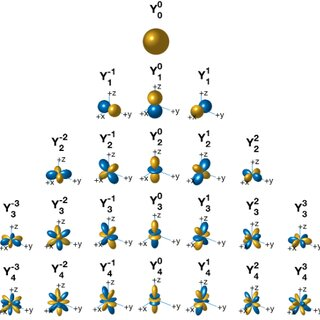

## A vous




### Se rappeler des coordonnées sphériques

#### ♡♡

Avez-vous retenu les formules de changement de coordonnnée sphérique $\to$ cartérisien ?

Sinon, retrouvez-les à l'aide du dessin ci-dessous.

Spherical_Coordinates_(Colatitude,_Longitude)_(b).svg

### Les harmoniques sphériques ne sont pas harmonique!

Une harmonique sphérique, en une phrase, c'est: la trace sur la sphére d'une fonction harmonique à variables séparées en $r,\theta,\phi$.


Mais ce n'est pas une fonction harmonique sur $\mathbb R^3$! (puisque ces dernières sont des fonctions à 3 variables).

Cependant, on peut décomposer le Laplacien sphérique ainsi:
$$
\dot \Delta = \Delta_r + \Delta_{\theta,\phi}
$$
avec
$$
\Delta_r f={\frac {\partial ^{2}f}{\partial r^{2}}}+{\frac {2}{r}}{\frac {\partial f}{\partial r}}
$$
et pour $r$ fixé:
$$
\Delta_{\theta,\phi} f= {\frac {1}{r^{2}}}{\frac {\partial ^{2}f}{\partial \theta ^{2}}}+{\frac {1}{r^{2}\tan \theta }}{\frac {\partial f}{\partial \theta }}+{\frac {1}{r^{2}\sin ^{2}\theta }}{\frac {\partial ^{2}f}{\partial \varphi ^{2}}}
$$
Montrez que les harmoniques sphériques sont solutions de
$$
\Delta_{\theta,\phi} f = const f
$$
(= les fonctions propres du laplacien sur la sphére).


### Problème de Poisson






On admettra que toutes les fonctions harmoniques s'expriment comme des combinaison linéaire (éventuellement infinie) des fonctions harmoniques à variables séparées.


En relisant le début du TP indiquer:



















#### ♡♡♡♡


* Quels sont les (rares) fonctions harmoniques bornées sur $\mathbb R^3$? Bornées sur la boulle unité? Bornée sur le complémentaire de la boule unité?



* On se donne une fonction continue $\Gamma(\theta,\phi)$ définie sur la sphére. Avec une formule précise, montrez que l'on peut construire une fonction harmoniques $f(r,\theta,\phi)$ qui est bornée sur la boule unité, et qui prend la valeur $\Gamma$ sur la sphére unité.


* Montrez que l'on peut construire une fonction harmoniques $f(r,\theta,\phi)$ qui est bornée sur le complémentaire de la boule unité, et qui prend la valeur $\Gamma$ sur la sphére unité.

### Point aléatoire

#### ♡♡♡

Vérifiez que notre decomposeur fonctionne aussi si on lui donne à retrouver une fonction définie sur les points aléatoires. Par exemple:

In [ ]:
θ = np.random.uniform(0,np.pi,1000)
ϕ = np.random.uniform(0,2*np.pi,1000)
value=fn_on_sphere(θ,ϕ)

In [ ]:
fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot(projection='3d')
SpherePlot.scatter_color(ax,θ,ϕ,value)

Interpoler ces points pour avoir une meilleurs représentation de la fonction samplée aléatoirement.

### Mesure uniforme


#### ♡



Quand on fait le changement de variable en coordonnes sphérique, en calculant le Jacobien de cette transformation on voit que:
$$
dx \,dy\, dz  =  r^2dr \, \sin(\theta) d\theta\, dϕ
$$

À quel endroit a-t-on utilisé cela?






### Coordonnées polaires


Sur $\mathbb R^2$, le laplacien en coordonnées polaire s'écrit:

$$
{\displaystyle {\begin{aligned}\Delta_{r,\theta} f&={\frac {1}{r}}{\frac {\partial }{\partial r}}\left(r{\frac {\partial f}{\partial r}}\right)+{\frac {1}{r^{2}}}{\frac {\partial ^{2}f}{\partial \theta ^{2}}}\\
&={\frac {\partial ^{2}f}{\partial r^{2}}}+{\frac {1}{r}}{\frac {\partial f}{\partial r}}+{\frac {1}{r^{2}}}{\frac {\partial ^{2}f}{\partial \theta ^{2}}}
\end{aligned}}}
$$
Voici démonstration [ICI](https://drive.google.com/file/d/1bz2RDODlBgJUDs52mGPS5sEePYbgLLYw/view?usp=drive_link)

On peut le décomposer en:
$$
\Delta_{r,\theta} f = \Delta_{r}f + \Delta_{\theta}f
$$
avec
$$
\Delta_{r}f = {\frac {\partial ^{2}f}{\partial r^{2}}}+{\frac {1}{r}}{\frac {\partial f}{\partial r}}
$$
Et pour $r$ fixé:
$$
\Delta_{\theta}f= {\frac {1}{r^{2}}}{\frac {\partial ^{2}f}{\partial \theta ^{2}}}
$$

#### ♡♡♡♡

Considérons une fonction à variable séparé $f(r,\theta)=R(r)S(\theta)$ qui vérifie $\Delta_{r,\theta}f=0$.

Montrez que $S$ est la solution d'une EDO très simple que vous résoudrez.

Vous comprendrez ainsi pourquoi la transformée en Harmonique sphérique peut aussi être appelée "transformée de Fourier".

Si vous voulez connaitre queles sont les formes possibles pour $R(r)$, lisez [ce document](https://drive.google.com/file/d/1bz2RDODlBgJUDs52mGPS5sEePYbgLLYw/view?usp=drive_link)